In [1]:
import rioxarray as rxr
import matplotlib.pyplot as plt
import geopandas as gpd
import opera_utils
import numpy as np
import pandas as pd
import warnings


In [2]:
fname="HDF4_EOS:EOS_GRID:/Users/bato/Downloads/MOD10CM.A2024032.061.2024066092140.hdf:MOD_CMG_Snow_5km:Snow_Cover_Monthly_CMG"
modis = rxr.open_rasterio(fname)
modis

<xarray.DataArray (band: 1, y: 3600, x: 7200)>
[25920000 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * y            (y) float64 89.97 89.92 89.88 89.82 ... -89.88 -89.93 -89.98
    spatial_ref  int64 0
Attributes: (12/64)
    ALGORITHMPACKAGEACCEPTANCEDATE:     03-2006
    ALGORITHMPACKAGEMATURITYCODE:       Normal
    ALGORITHMPACKAGENAME:               MOD_PR10CM
    ALGORITHMPACKAGEVERSION:            6
    Antarctica_snow_note:               Antarctica deliberately mapped as snow
    ASSOCIATEDINSTRUMENTSHORTNAME.1:    MODIS
    ...                                 ...
    VERSIONID:                          61
    WESTBOUNDINGCOORDINATE:             -180.0
    ZONEIDENTIFIER:                     Other Grid System
    _FillValue:                         255
    scale_factor:                       1.0
    add_offset:                         0.0

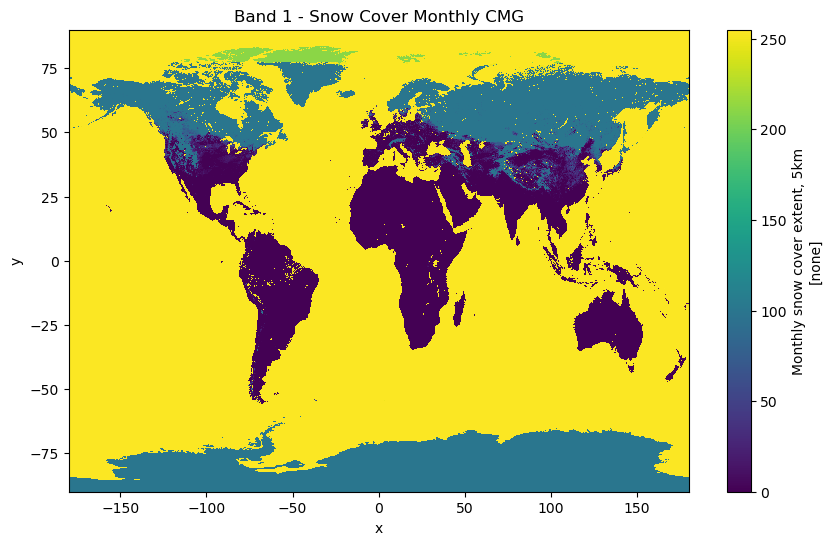

In [3]:
# Select the first band and plot it
snowcover = modis.isel(band=0)

# Plot the first band
plt.figure(figsize=(10, 6))
snowcover.plot(cmap="viridis")
plt.title("Band 1 - Snow Cover Monthly CMG")
plt.show()

In [4]:
gdf_frames = opera_utils.get_frame_geojson(as_geodataframe=True)
gdf_frames = gdf_frames.loc[gdf_frames.is_north_america == "1"].reset_index()

In [5]:
# Reproject the GeoDataFrame to match the CRS of the raster, if necessary
gdf_frames = gdf_frames.to_crs(snowcover.rio.crs)
gdf_frames

,frame_id,is_land,is_north_america,orbit_pass,geometry
0,95,1,1,DESCENDING,"POLYGON ((172.89022 52.62514, 173.27551 54.149..."
1,96,1,1,DESCENDING,"POLYGON ((172.56574 51.30483, 172.94167 52.829..."
2,831,1,1,ASCENDING,"POLYGON ((-77.94576 34.98502, -75.24164 35.502..."
3,832,1,1,ASCENDING,"POLYGON ((-78.25801 36.31338, -75.50781 36.829..."
4,833,1,1,ASCENDING,"POLYGON ((-78.57564 37.64111, -75.77622 38.155..."
...,...,...,...,...,...
1727,46808,1,1,DESCENDING,"POLYGON ((-160.86017 58.46467, -160.40745 59.9..."
1728,46809,1,1,DESCENDING,"POLYGON ((-161.23659 57.14740, -160.80009 58.6..."
1729,46810,1,1,DESCENDING,"POLYGON ((-161.59641 55.82921, -161.17890 57.3..."
1730,46811,1,1,DESCENDING,"POLYGON ((-161.94392 54.51036, -161.54082 56.0..."


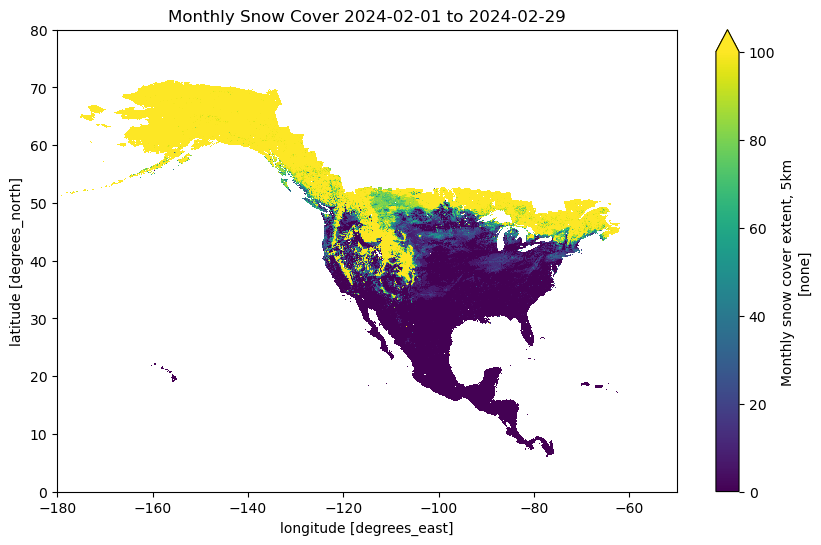

In [6]:
# Clip the raster to the GeoDataFrame
clipped = snowcover.rio.clip(gdf_frames.geometry)
clipped = clipped.where(clipped <= 250, np.nan)

# Plot the clipped raster
plt.figure(figsize=(10, 6))
clipped.plot(cmap="viridis", vmin=0, vmax=100)
plt.xlim(-180,-50)
plt.ylim(0,80)
plt.title(f"Monthly Snow Cover {modis.attrs['RANGEBEGINNINGDATE']} to {modis.attrs['RANGEENDINGDATE']}")
plt.show()

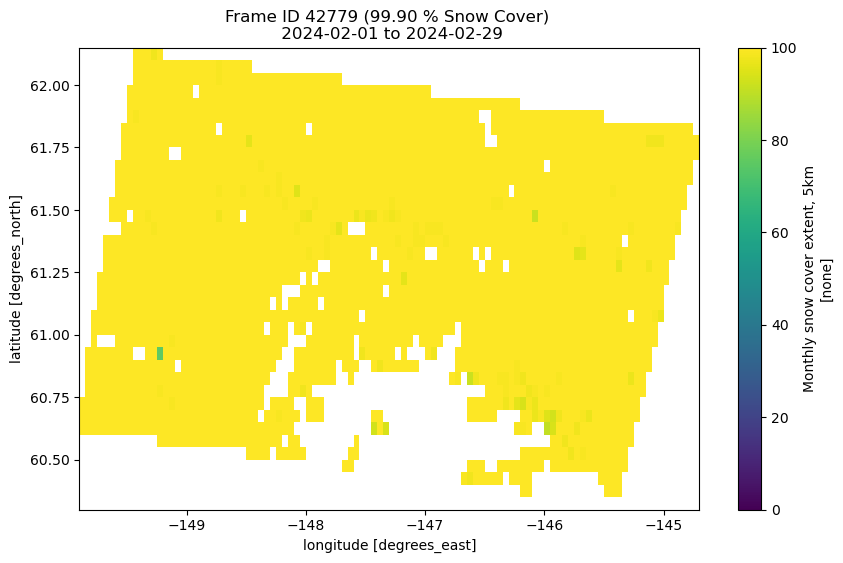

In [7]:
# Clip to a frame boundary in Alaska
F42779 = gdf_frames[gdf_frames.frame_id==42779]
clipped = snowcover.rio.clip(F42779.geometry)
clipped = clipped.where(clipped < 249, np.nan)

# Plot the clipped raster
plt.figure(figsize=(10, 6))
clipped.plot(cmap="viridis", vmin=0, vmax=100)
# plt.xlim(-180,-50)
# plt.ylim(0,80)
plt.title(f"Frame ID {F42779.frame_id.values[0]} ({clipped.mean().values:.2f} % Snow Cover) \n {modis.attrs['RANGEBEGINNINGDATE']} to {modis.attrs['RANGEENDINGDATE']}")
plt.show()

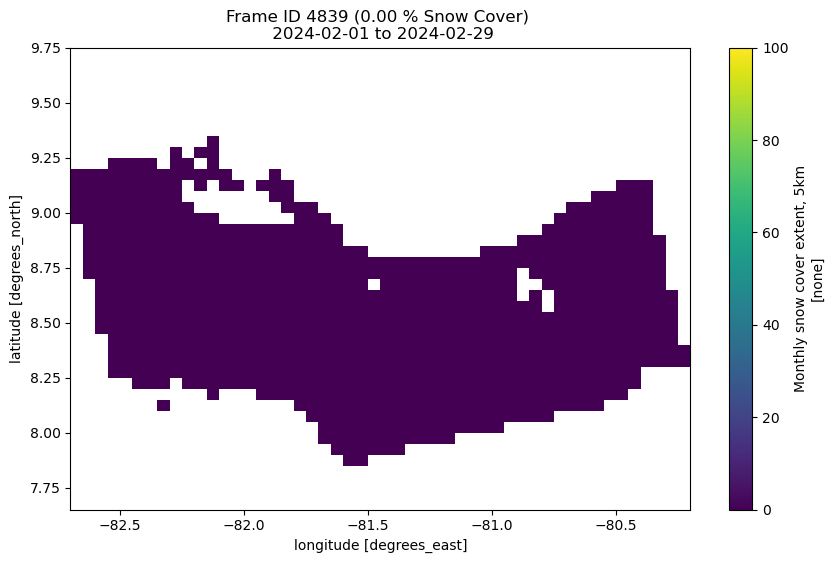

In [8]:
# Clip to a frame boundary in Central America
F04839 = gdf_frames[gdf_frames.frame_id==4839]
clipped = snowcover.rio.clip(F04839.geometry)
clipped = clipped.where(clipped < 249, np.nan)

# Plot the clipped raster
plt.figure(figsize=(10, 6))
clipped.plot(cmap="viridis", vmin=0, vmax=100)
# plt.xlim(-180,-50)
# plt.ylim(0,80)
plt.title(f"Frame ID {F04839.frame_id.values[0]} ({clipped.mean().values:.2f} % Snow Cover) \n {modis.attrs['RANGEBEGINNINGDATE']} to {modis.attrs['RANGEENDINGDATE']}")
plt.show()

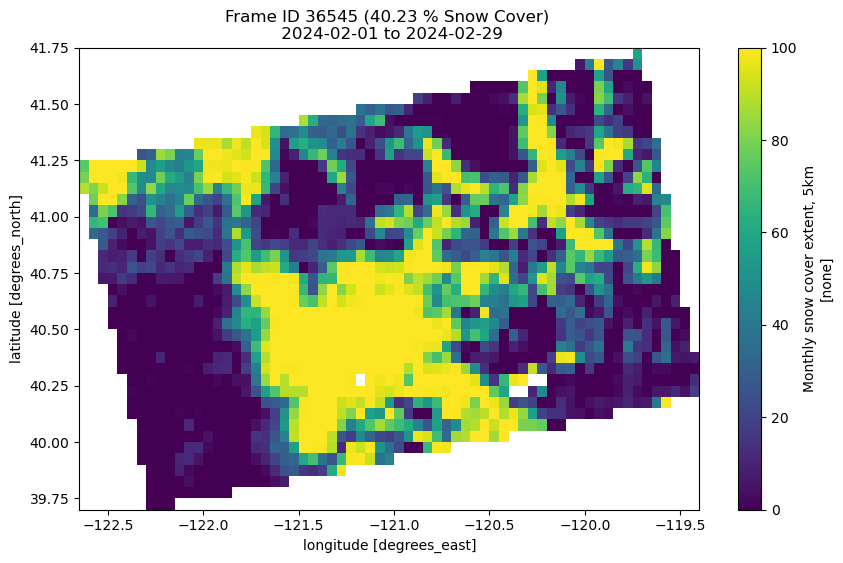

In [9]:
# Clip to a frame boundary in Central America
F36545 = gdf_frames[gdf_frames.frame_id==36545]
clipped = snowcover.rio.clip(F36545.geometry)
clipped = clipped.where(clipped < 249, np.nan)

# Plot the clipped raster
plt.figure(figsize=(10, 6))
clipped.plot(cmap="viridis", vmin=0, vmax=100)
# plt.xlim(-180,-50)
# plt.ylim(0,80)
plt.title(f"Frame ID {F36545.frame_id.values[0]} ({clipped.mean().values:.2f} % Snow Cover) \n {modis.attrs['RANGEBEGINNINGDATE']} to {modis.attrs['RANGEENDINGDATE']}")
plt.show()

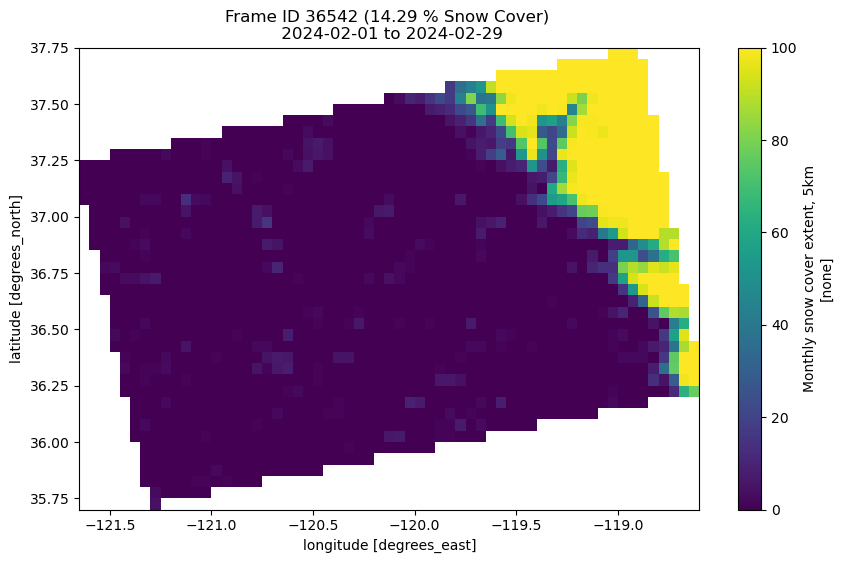

In [10]:
# Clip to a frame boundary in Central America
F36542 = gdf_frames[gdf_frames.frame_id==36542]
clipped = snowcover.rio.clip(F36542.geometry)
clipped = clipped.where(clipped < 249, np.nan)

# Plot the clipped raster
plt.figure(figsize=(10, 6))
clipped.plot(cmap="viridis", vmin=0, vmax=100)
# plt.xlim(-180,-50)
# plt.ylim(0,80)
plt.title(f"Frame ID {F36542.frame_id.values[0]} ({clipped.mean().values:.2f} % Snow Cover) \n {modis.attrs['RANGEBEGINNINGDATE']} to {modis.attrs['RANGEENDINGDATE']}")
plt.show()

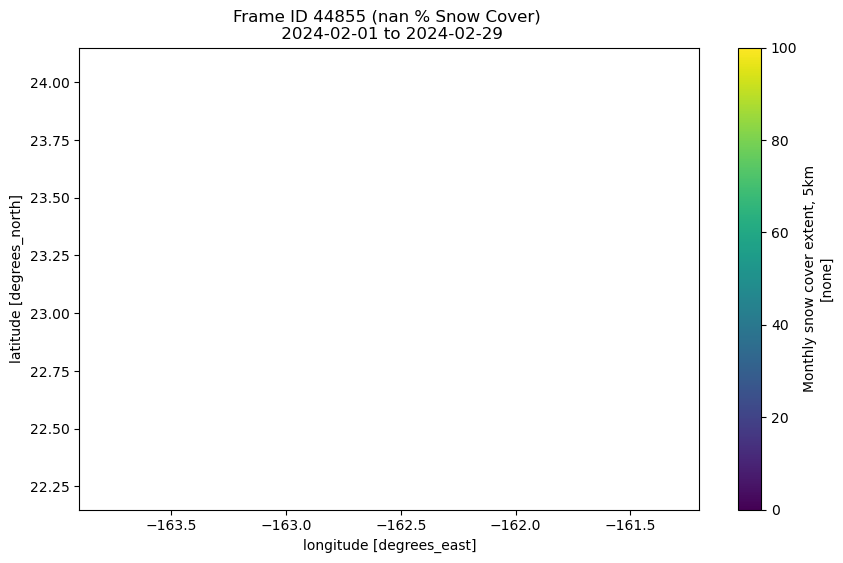

In [11]:
# Clip to a frame boundary in Central America
F44855 = gdf_frames[gdf_frames.frame_id==44855]
clipped = snowcover.rio.clip(F44855.geometry)
clipped = clipped.where(clipped < 249, np.nan)

# Plot the clipped raster
plt.figure(figsize=(10, 6))
clipped.plot(cmap="viridis", vmin=0, vmax=100)
# plt.xlim(-180,-50)
# plt.ylim(0,80)
plt.title(f"Frame ID {F44855.frame_id.values[0]} ({clipped.mean().values:.2f} % Snow Cover) \n {modis.attrs['RANGEBEGINNINGDATE']} to {modis.attrs['RANGEENDINGDATE']}")
plt.show()

In [12]:
# Calculate mean snow cover for each frame_id
mean_values = []

# Suppress RuntimeWarnings temporarily
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    
    for idx, row in gdf_frames.iterrows():
        frame_id = row['frame_id']
        geometry = row['geometry']
        
        # Clip the raster to the current geometry
        clipped = snowcover.rio.clip([geometry])
        
        # Remove pixels above 250
        clipped = clipped.where(clipped <= 249, np.nan)
        
        # Calculate the mean of the clipped raster 
        mean_value = np.nanmean(clipped).item()  # .item() extracts the scalar from the array
        mean_values.append(mean_value)

# Append mean_values as a column in gdf_frames
gdf_frames["mean_snowcover"] = mean_values
gdf_frames

,frame_id,is_land,is_north_america,orbit_pass,geometry,mean_snowcover
0,95,1,1,DESCENDING,"POLYGON ((172.89022 52.62514, 173.27551 54.149...",100.000000
1,96,1,1,DESCENDING,"POLYGON ((172.56574 51.30483, 172.94167 52.829...",100.000000
2,831,1,1,ASCENDING,"POLYGON ((-77.94576 34.98502, -75.24164 35.502...",1.566952
3,832,1,1,ASCENDING,"POLYGON ((-78.25801 36.31338, -75.50781 36.829...",1.116519
4,833,1,1,ASCENDING,"POLYGON ((-78.57564 37.64111, -75.77622 38.155...",1.982888
...,...,...,...,...,...,...
1727,46808,1,1,DESCENDING,"POLYGON ((-160.86017 58.46467, -160.40745 59.9...",99.980974
1728,46809,1,1,DESCENDING,"POLYGON ((-161.23659 57.14740, -160.80009 58.6...",94.770291
1729,46810,1,1,DESCENDING,"POLYGON ((-161.59641 55.82921, -161.17890 57.3...",93.288344
1730,46811,1,1,DESCENDING,"POLYGON ((-161.94392 54.51036, -161.54082 56.0...",88.594883


In [14]:
# Check where are the nan values
nan_frames = gdf_frames[gdf_frames.mean_snowcover.isnull()]
nan_frames

,frame_id,is_land,is_north_america,orbit_pass,geometry,mean_snowcover
66,1899,1,1,ASCENDING,"POLYGON ((-174.90365 27.04612, -172.42339 27.5...",NaN
154,4846,1,1,ASCENDING,"POLYGON ((-84.64791 18.51961, -82.32293 19.067...",NaN
155,4854,1,1,ASCENDING,"POLYGON ((-86.91554 29.17922, -84.38199 29.706...",NaN
236,6830,1,1,DESCENDING,"POLYGON ((-90.53388 22.49507, -90.23754 24.029...",NaN
284,7661,1,1,DESCENDING,"POLYGON ((-171.64451 -11.44936, -171.28511 -9....",NaN
285,7663,1,1,DESCENDING,"POLYGON ((-172.28881 -14.09948, -171.91501 -12...",NaN
286,7664,1,1,DESCENDING,"POLYGON ((-172.61796 -15.42369, -172.23906 -13...",NaN
357,9684,1,1,ASCENDING,"POLYGON ((-170.43320 25.39525, -167.98924 25.9...",NaN
431,11661,1,1,DESCENDING,"POLYGON ((-174.40530 24.94609, -174.10851 26.4...",NaN
497,13467,1,1,ASCENDING,"POLYGON ((-164.12615 55.84352, -164.70799 57.3...",NaN


In [16]:
# Center coordinates of the US
us_center = [37.0902, -95.7129]

# Plot frames with nanvalues
nan_frames[['frame_id', 'geometry']].explore(
    location=us_center, 
    zoom_start=3,
    color="red",
)

In [17]:
# Replace nans to -1 so we can track later
gdf_frames.mean_snowcover.fillna(-1, inplace=True)
gdf_frames

,frame_id,is_land,is_north_america,orbit_pass,geometry,mean_snowcover
0,95,1,1,DESCENDING,"POLYGON ((172.89022 52.62514, 173.27551 54.149...",100.000000
1,96,1,1,DESCENDING,"POLYGON ((172.56574 51.30483, 172.94167 52.829...",100.000000
2,831,1,1,ASCENDING,"POLYGON ((-77.94576 34.98502, -75.24164 35.502...",1.566952
3,832,1,1,ASCENDING,"POLYGON ((-78.25801 36.31338, -75.50781 36.829...",1.116519
4,833,1,1,ASCENDING,"POLYGON ((-78.57564 37.64111, -75.77622 38.155...",1.982888
...,...,...,...,...,...,...
1727,46808,1,1,DESCENDING,"POLYGON ((-160.86017 58.46467, -160.40745 59.9...",99.980974
1728,46809,1,1,DESCENDING,"POLYGON ((-161.23659 57.14740, -160.80009 58.6...",94.770291
1729,46810,1,1,DESCENDING,"POLYGON ((-161.59641 55.82921, -161.17890 57.3...",93.288344
1730,46811,1,1,DESCENDING,"POLYGON ((-161.94392 54.51036, -161.54082 56.0...",88.594883


In [18]:
threshold_snowcover = 40
gdf_frames['to_process'] = gdf_frames['mean_snowcover'].apply(lambda x: 0 if x >= threshold_snowcover else 1)
gdf_frames

,frame_id,is_land,is_north_america,orbit_pass,geometry,mean_snowcover,to_process
0,95,1,1,DESCENDING,"POLYGON ((172.89022 52.62514, 173.27551 54.149...",100.000000,0
1,96,1,1,DESCENDING,"POLYGON ((172.56574 51.30483, 172.94167 52.829...",100.000000,0
2,831,1,1,ASCENDING,"POLYGON ((-77.94576 34.98502, -75.24164 35.502...",1.566952,1
3,832,1,1,ASCENDING,"POLYGON ((-78.25801 36.31338, -75.50781 36.829...",1.116519,1
4,833,1,1,ASCENDING,"POLYGON ((-78.57564 37.64111, -75.77622 38.155...",1.982888,1
...,...,...,...,...,...,...,...
1727,46808,1,1,DESCENDING,"POLYGON ((-160.86017 58.46467, -160.40745 59.9...",99.980974,0
1728,46809,1,1,DESCENDING,"POLYGON ((-161.23659 57.14740, -160.80009 58.6...",94.770291,0
1729,46810,1,1,DESCENDING,"POLYGON ((-161.59641 55.82921, -161.17890 57.3...",93.288344,0
1730,46811,1,1,DESCENDING,"POLYGON ((-161.94392 54.51036, -161.54082 56.0...",88.594883,0


In [25]:
# Center coordinates of the US
us_center = [37.0902, -95.7129]

# Plot mean_snowcover
gdf_frames[['frame_id', 'geometry', 'mean_snowcover']].explore(
    "mean_snowcover", 
    vmin=0,
    vmax=100,
    location=us_center, 
    zoom_start=3,
    cmap="inferno",
)

In [24]:
# Center coordinates of the US
us_center = [37.0902, -95.7129]

# Plot to_process
gdf_frames[['frame_id', 'geometry', 'mean_snowcover', 'to_process']].explore(
    "to_process", 
    vmin=0,
    vmax=1,
    location=us_center, 
    zoom_start=3,
    cmap="RdBu",
)